# Phase 1: 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [39]:
train_df = pd.read_json("train.json")
train_df

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],medium,40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",low,40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,210 West 107th Street
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",low,40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6867392_b18283f6...,5645,155 West 21st Street
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",medium,40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",low,40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th


In [3]:
train_df.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
interest_level      object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
dtype: object

## Visualization of target variable (interest level)

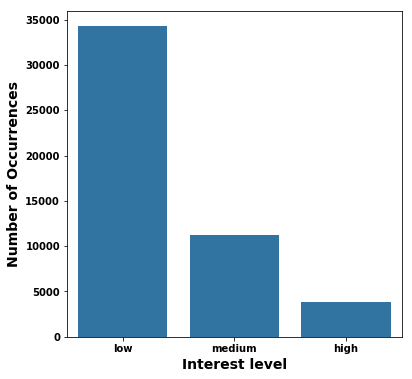

In [4]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(int_level.index, int_level.values, alpha=1, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=14, fontweight='bold')
plt.xlabel('Interest level', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

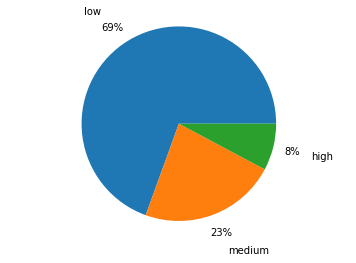

In [5]:
plt.pie(int_level.values,(0,0,0),int_level.index, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
plt.axis('equal')
plt.show()

## Hour-wise listing trend

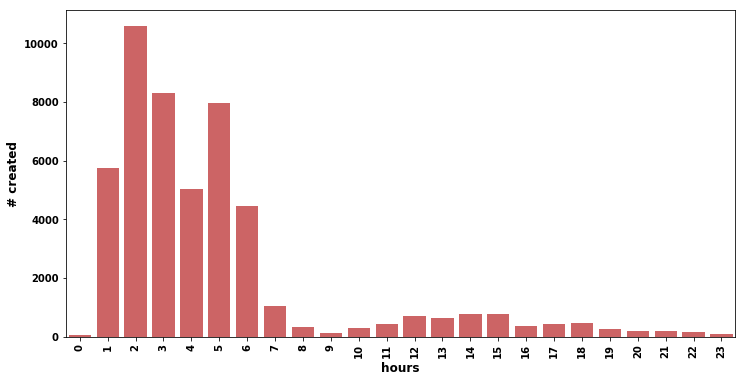

In [6]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["hour_created"] = train_df["created"].dt.hour
hour = train_df['hour_created'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(hour.index, hour.values, alpha=0.8, color=color[3])
plt.xlabel('hours', fontsize=12, fontweight='bold')
plt.ylabel('# created', fontsize=12, fontweight='bold')
plt.xticks(rotation='vertical', fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

In [7]:
top5 = hour[:5]
print("Busiest 5:\n",top5)

('Busiest 5:\n', 2    10596
3     8318
5     7954
1     5749
4     5021
Name: hour_created, dtype: int64)


## Visualizing features

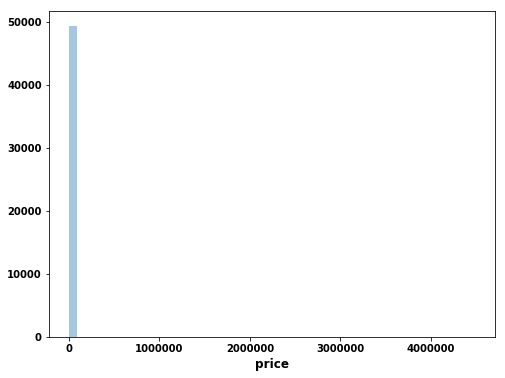

In [8]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=False)
plt.xlabel('price', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

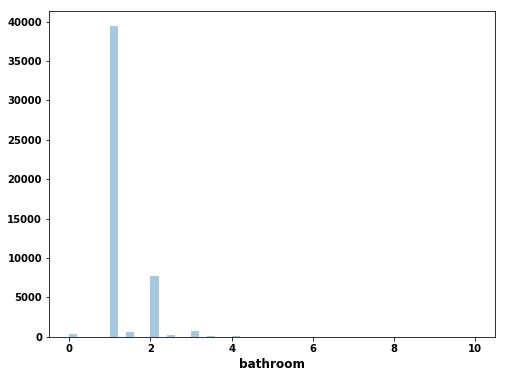

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.bathrooms.values, kde=False)
plt.xlabel('bathroom', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

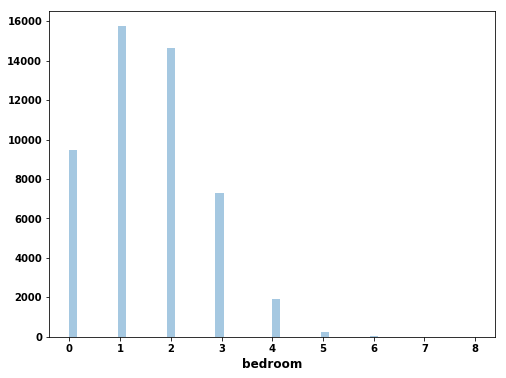

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.bedrooms.values, kde=False)
plt.xlabel('bedroom', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

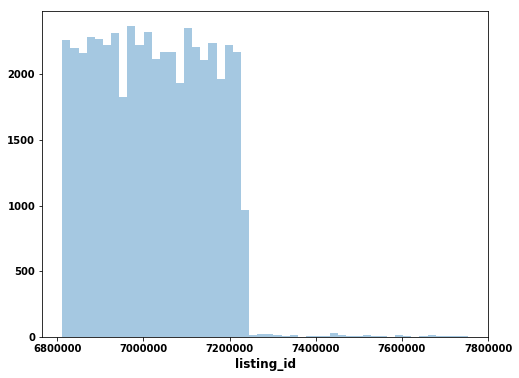

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.listing_id.values, bins=50, kde=False)
plt.xlabel('listing_id', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

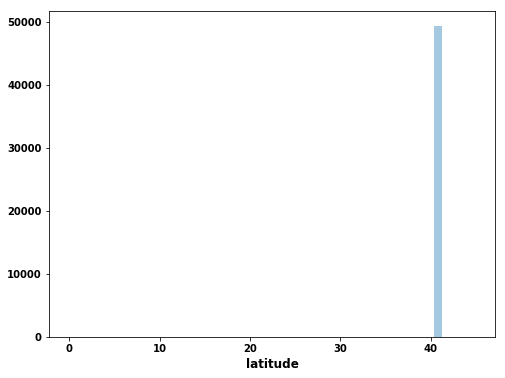

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, kde=False)
plt.xlabel('latitude', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

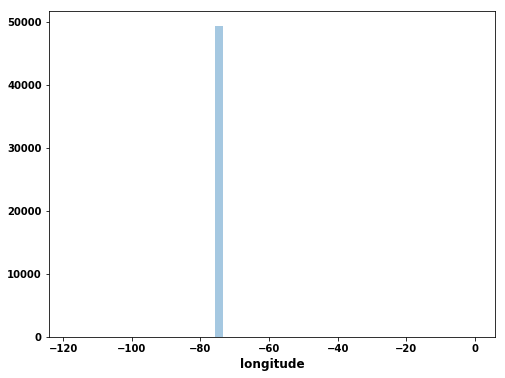

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, kde=False)
plt.xlabel('longitude', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


## Handling missing values

In [14]:
# check if there are any null/nan values

train_df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
hour_created       0
dtype: int64

### Bedrooms

In [15]:
# aggregate bedroom values by count
train_df.groupby('bedrooms').count()

,bathrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,hour_created
bedrooms,,,,,,,,,,,,,,,
0,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475
1,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752
2,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623
3,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276
4,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929
5,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247
6,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
7,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
8,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [16]:
# sum count of all bedroom values
train_df.groupby('bedrooms').count().sum()

bathrooms          49352
building_id        49352
created            49352
description        49352
display_address    49352
features           49352
interest_level     49352
latitude           49352
listing_id         49352
longitude          49352
manager_id         49352
photos             49352
price              49352
street_address     49352
hour_created       49352
dtype: int64

We found 9475 values with a bedroom count of 0. This is simply too high of a number to assume it is an error. Upon checking some photos, we realized that these are probably studio apartments so no bedrooms makes sense. When we aggregated the count of every value of bedrooms, we found there were no missing values.

### Bathrooms

In [17]:
# aggregate bathroom values by count
train_df.groupby('bathrooms').count()

,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,hour_created
bathrooms,,,,,,,,,,,,,,,
0.0,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313
1.0,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422,39422
1.5,645,645,645,645,645,645,645,645,645,645,645,645,645,645,645
2.0,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660
2.5,277,277,277,277,277,277,277,277,277,277,277,277,277,277,277
3.0,745,745,745,745,745,745,745,745,745,745,745,745,745,745,745
3.5,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
4.0,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159
4.5,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29


In [18]:
# sum the count of all bathroom values
train_df.groupby('bathrooms').count().sum()

bedrooms           49352
building_id        49352
created            49352
description        49352
display_address    49352
features           49352
interest_level     49352
latitude           49352
listing_id         49352
longitude          49352
manager_id         49352
photos             49352
price              49352
street_address     49352
hour_created       49352
dtype: int64

Again, we found no missing values for bathrooms.

### Building ID

In [19]:
#building_id

whichrow = 0
count = 0
for row in train_df['building_id']:
    if row=='0':
        count+=1 or any(c.isalpha() for c in row) == False
        #train_df.loc[train_df.index[whichrow], 'building_id'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(30)

('number of missing values: ', 8286)


It's unlikely that building ID has any effect on the interest level of a listing so we left these values.

### Description

In [20]:
#description

whichrow = 0
count = 0
for row in train_df['description']:
    if  any(c.isalpha() for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'description'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(50)

('number of missing values: ', 3336)


### Features

In [21]:
#features

whichrow = 0
count = 0
for row in train_df['features']:
    if row==[]:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'features'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(50)

('number of missing values: ', 3218)


In [22]:
#created

whichrow = 0
count = 0
for row in train_df['created']:
    if any(c.isalpha() for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'created'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

TypeError: 'Timestamp' object is not iterable

In [ ]:
#display_address

whichrow = 0
count = 0
for row in train_df['display_address']:
    if any(c.isalpha() for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'display_address'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

In [ ]:
#street_address

whichrow = 0
count = 0
for row in train_df['street_address']:
    if any(c.isalpha() for c in row) == False :
        count+=1
        #train_df.loc[train_df.index[whichrow], 'street_address'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

In [ ]:
#latitude

whichrow = 0
count = 0
for row in train_df['latitude']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'latitude'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

In [ ]:
#listing_id

whichrow = 0
count = 0
for row in train_df['listing_id']:
    if row==0 or row=='null':
        count+=1
        #train_df.loc[train_df.index[whichrow], 'listing_id'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

In [ ]:
#longitude

whichrow = 0
count = 0
for row in train_df['longitude']:
    if row==0 or row=='null':
        count+=1
        #train_df.loc[train_df.index[whichrow], 'longitude'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

In [ ]:
#manager_id

whichrow = 0
count = 0
for row in train_df['manager_id']:
    if  row==0 or any(c.isalpha() for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'manager_id'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

In [ ]:
#photos

whichrow = 0
count = 0
for row in train_df['photos']:
    if  any(isinstance(c,str) for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'photos'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

In [ ]:
#price

whichrow = 0
count = 0
for row in train_df['price']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

In [ ]:
#interest_level

whichrow = 0
count = 0
list= ["low", "medium", "high"]
for row in train_df['interest_level']:
    if row not in list :
        count+=1
        #train_df.loc[train_df.index[whichrow], 'interest_level'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

In [ ]:
#pd.options.display.max_colwidth = 10

## Handling outliers

### Prices

In [27]:
# prices (inner fences=mild outliers)

q25, q75 = np.percentile(train_df['price'].values, 25), np.percentile(train_df['price'].values, 75)
iqr = q75-q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['price'].values if x > upper or x < lower]
print ("number of mild outliers:", len(outliers))

('number of mild outliers:', 2788)


In [28]:
# prices (outer fences=extreme outliers)
cutoff = iqr * 3
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['price'].values if x > upper or x < lower]
print ("number of extreme outliers:", len(outliers))

('number of extreme outliers:', 1223)


### Latitude

In [29]:
q25, q75 = np.percentile(train_df['latitude'].values, 25), np.percentile(train_df['latitude'].values, 75)
iqr = q75-q25
cutoff = iqr * 3
outliers = [x for x in train_df['latitude'].values if x > upper or x < lower]
print ("number of extreme outliers:", len(outliers))

('number of extreme outliers:', 0)


In [30]:
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['latitude'].values if x > upper or x < lower]
print ("number of mild outliers:", len(outliers))


('number of mild outliers:', 1932)


### Longitude

In [31]:
q25, q75 = np.percentile(train_df['longitude'].values, 25), np.percentile(train_df['longitude'].values, 75)
iqr = q75-q25
cutoff = iqr * 3
outliers = [x for x in train_df['longitude'].values if x > upper or x < lower]
print ("number of extreme outliers:", len(outliers))

('number of extreme outliers:', 49352)


In [32]:
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['longitude'].values if x > upper or x < lower]
print ("number of mild outliers:", len(outliers))

('number of mild outliers:', 1102)


In [33]:
train_df.sort_values(by='bathrooms', ascending=False)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,hour_created
104459,10.0,2,424f8014bddc288d26da5fe81d0bea02,2016-04-09 04:34:31,***The building?s well-attended lobby welcomes...,W 52 St.,"[Doorman, Elevator, Fitness Center, Laundry in...",low,40.7633,6849204,-73.9849,0c71a59cb70215fbf49c9dd93efaa172,[https://photos.renthop.com/2/6849204_1f92b58a...,3600,260 W 52 St.,4
84566,7.0,5,0,2016-04-07 17:06:29,Extraordinary in every way. This single family...,West 9th St- High Class Townhome,[],low,40.7335,6840943,-73.9974,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6840943_7f4b82cf...,60000,47th West 9th St,17
26937,6.5,7,3be1175591e290053aa6997ac8f4e3bb,2016-06-22 03:15:54,This landmark English stone manor sits majesti...,206 Upper Mountain Avenu,"[Garage, Garden, Doorman]",low,40.8336,7198431,-74.2160,1d019cccf631394cd7f2aba471a54ca4,[https://photos.renthop.com/2/7198431_70d9d8ff...,14500,206 Upper Mountain Avenu,3
30788,6.0,5,1c2f695696013f4068f89619d06b174f,2016-06-01 02:14:51,"<BR>Home in the sky. One-of-a-kind, 5 Bedrooms...",East 60th Street,"[Doorman, Elevator, Laundry in Unit, Dogs Allo...",low,40.7603,7088146,-73.9610,161a1a797a1e57f6ba979447a0eadf94,[https://photos.renthop.com/2/7088146_9c0380cd...,28000,401 East 60th Street,2
13701,6.0,5,27531221dd5b7a63504847f7aafe45bb,2016-06-03 02:10:23,Stately 5-story townhouse residence on East 67...,East 67th Street,"[Fireplace, Doorman, Elevator, Dogs Allowed, C...",low,40.7657,7101290,-73.9614,df7d8f04e475b5f1a34b45509b14bd70,[https://photos.renthop.com/2/7101290_ea1c58ff...,45000,240 East 67th Street,2
91709,6.0,6,d20bce0bc08b2731f726067a1e501162,2016-04-16 02:22:15,MANSION IN THE SKY!!! This six-bedroom full-fl...,230 West 56th Street,"[Doorman, Elevator, Furnished, Laundry in Unit...",low,40.7654,6881666,-73.9822,37ffeac28297e956deecd7b31940c6e7,[https://photos.renthop.com/2/6881666_bedcd181...,100000,230 West 56th Street,2
79611,6.0,5,1c2f695696013f4068f89619d06b174f,2016-05-02 02:12:06,"<BR>Home in the sky. One-of-a-kind, 5 Bedrooms...",East 60th Street,"[Doorman, Elevator, Laundry in Unit, Dogs Allo...",low,40.7603,6952330,-73.9610,c8e5586edfdb8fd3cdc6f9c3a9bf4678,[https://photos.renthop.com/2/6952330_ca372c6f...,28000,401 East 60th Street,2
52189,5.5,4,2094beb4097c7f56670afba5b01b31a4,2016-05-08 02:23:58,1 OF A KIND....Luxury PENTHOUSE Duplex with ma...,E 39th St.,"[Swimming Pool, Roof Deck, Dining Room, Balcon...",low,40.7479,6981983,-73.9746,c9c33695ee2a2f818e9f1d8f7d1c4b39,[https://photos.renthop.com/2/6981983_6022bde4...,30000,240 E 39th St.,2
96387,5.5,4,2094beb4097c7f56670afba5b01b31a4,2016-04-05 03:28:02,1 OF A KIND....Luxury PENTHOUSE Duplex with ma...,E 39th St.,"[Swimming Pool, Roof Deck, Dining Room, Balcon...",low,40.7479,6824508,-73.9746,c9c33695ee2a2f818e9f1d8f7d1c4b39,[https://photos.renthop.com/2/6824508_125396ce...,30000,240 E 39th St.,3
99199,5.5,4,0,2016-04-10 05:27:50,"Brand New 3,600 Sqft Luxury Upper East Side Tr...",523b E 85th St.,"[Dining Room, Garden/Patio, Terrace, Laundry i...",low,40.7749,6853808,-73.9464,5a098d61c10d161da0a026e70a006557,[https://photos.renthop.com/2/6853808_d4c94793...,30000,523b E 85th St.,5


### Bathroom and Bedrooms

Outlier detection for bathrooms and bedrooms isn't meaningful because all values fall within a tidy distribution. All d have the values aren't out of the norm, for example a large penthouse suite/condo could have 10 bedrooms.

### Created

Since no missing values were found, it doesn't seem meaningful to detect outliers since the only outlier values would be missing values or dates that don't exist (not one of 365 days in a year).

### Building ID, Manager ID, Listing ID

Again, not meaningful for outliers because there is no real meaning to these values, other than to identify the listing.

### Photos, Description, Features, Addresses

No discernable way to identify outliers until we are able to extract these features. Outliers would probably be photos of objects other than the listing, and text that doesn't relate, or an address outside of New York.

## Text feature extraction

### Encode unicode to strings

In [40]:
train_df['description'] = train_df['description'].apply(lambda x: x.encode('utf-8').strip())

In [41]:
# vectorize each description into a new column by frequency
# common stop words are excluded like a, the, in, etc.
# matches tokens of length 2+

vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', token_pattern=r'^[a-zA-Z][a-zA-Z]+')
vectorizer.fit(train_df['description'].values);
train_df['desc_vect'] = train_df['description'].apply(lambda x: vectorizer.transform([x]))
#vectorizer.vocabulary_  #shows all tokens

In [42]:
# vectorize each description into a new column by count
# matches words of lenght 2+

vectorizer = CountVectorizer(token_pattern=r'^[a-zA-Z][a-zA-Z]+', stop_words='english')
vectorizer.fit(train_df['description'].values);
#train_df['desc_vect'] = train_df['description'].apply(lambda x: vectorizer.transform([x]))


In [37]:
# convert features list to string
train_df['features'] = train_df['features'].apply(lambda x: ' '.join(x))

In [38]:
# vectorize features in new column by count

vectorizer.fit(train_df['features'].values);
train_df['feat_vect'] = train_df['features'].apply(lambda x: vectorizer.transform([x]))
# vectorizer.vocabulary_  #shows all tokens

## Image feature extraction